In [13]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as st
import numpy as np
import pickle

import src.cleaning_utils as cln
import src.modeling_utils as mdl
df_og = cln.cleaning_global()

In [15]:
sns.set(rc = {'figure.figsize': (10, 5)}) 
df = df_og.copy()

In [16]:
vehicle_price = df.groupby('CarName').price.mean()
df['price_order'] = pd.qcut(df.price, 3, labels=['cheap', 'medium', 'high'])

In [17]:
reg_df = df[['price', 'curbweight', 'enginesize', 'price_order']]

coeff : 12.816172553003906
intercept -19475.862380320825
r² score : 0.6977342414446954
kurtosis :  5.890297690132565
skewness :  1.5910280863094393


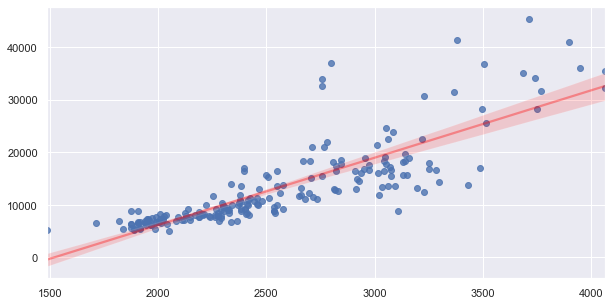

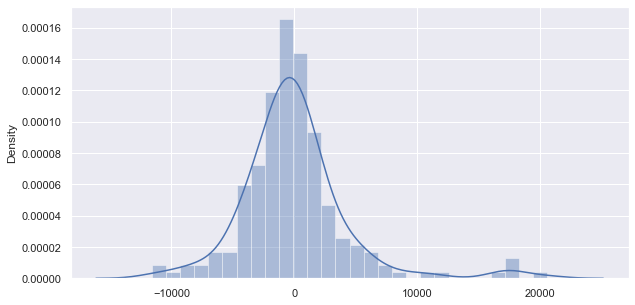

In [18]:
mdl.lin_reg_curbweight(reg_df)

In [19]:
mdl.lin_reg_multiple_price(reg_df)

coeff : [[  5.09213056 113.54147405]]
intercept [-14145.80824926]
r² score : 0.7945836303808418


In [20]:
df['brand'] = df.CarName.str.split().str[0]

In [21]:
df_categorial, cat_keys = mdl.encoding_cat_df(df)

In [22]:
mdl.lin_reg_cross_simple(df, 42)

train r² :  0.7038852996038018
test r² :  0.683584296334826


In [23]:
lin_reg = mdl.lin_reg_cross_multiple(df, 42)

train r² :  0.8038601227150541
test r² :  0.7750282597729271


In [24]:
pickle.dump(lin_reg, open('linear_reg_model.sav', 'wb'))